In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Reading the data
df = pd.read_excel('/content/Tree Making.xlsx')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


# EDA

In [ ]:
df.shape

(506, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [ ]:
df['CAT. MEDV'].value_counts()

0    422
1     84
Name: CAT. MEDV, dtype: int64

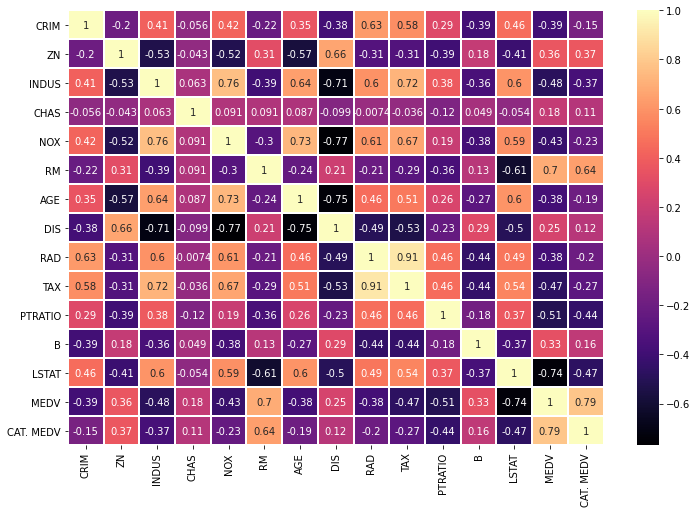

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), linewidths=1, annot = True, cmap = 'magma')

In [ ]:
del df['MEDV']

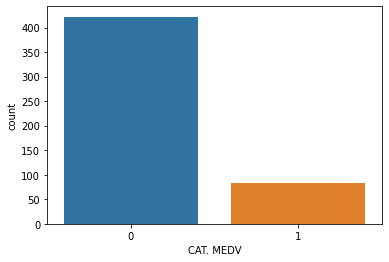

In [ ]:
sns.countplot(df['CAT. MEDV'])

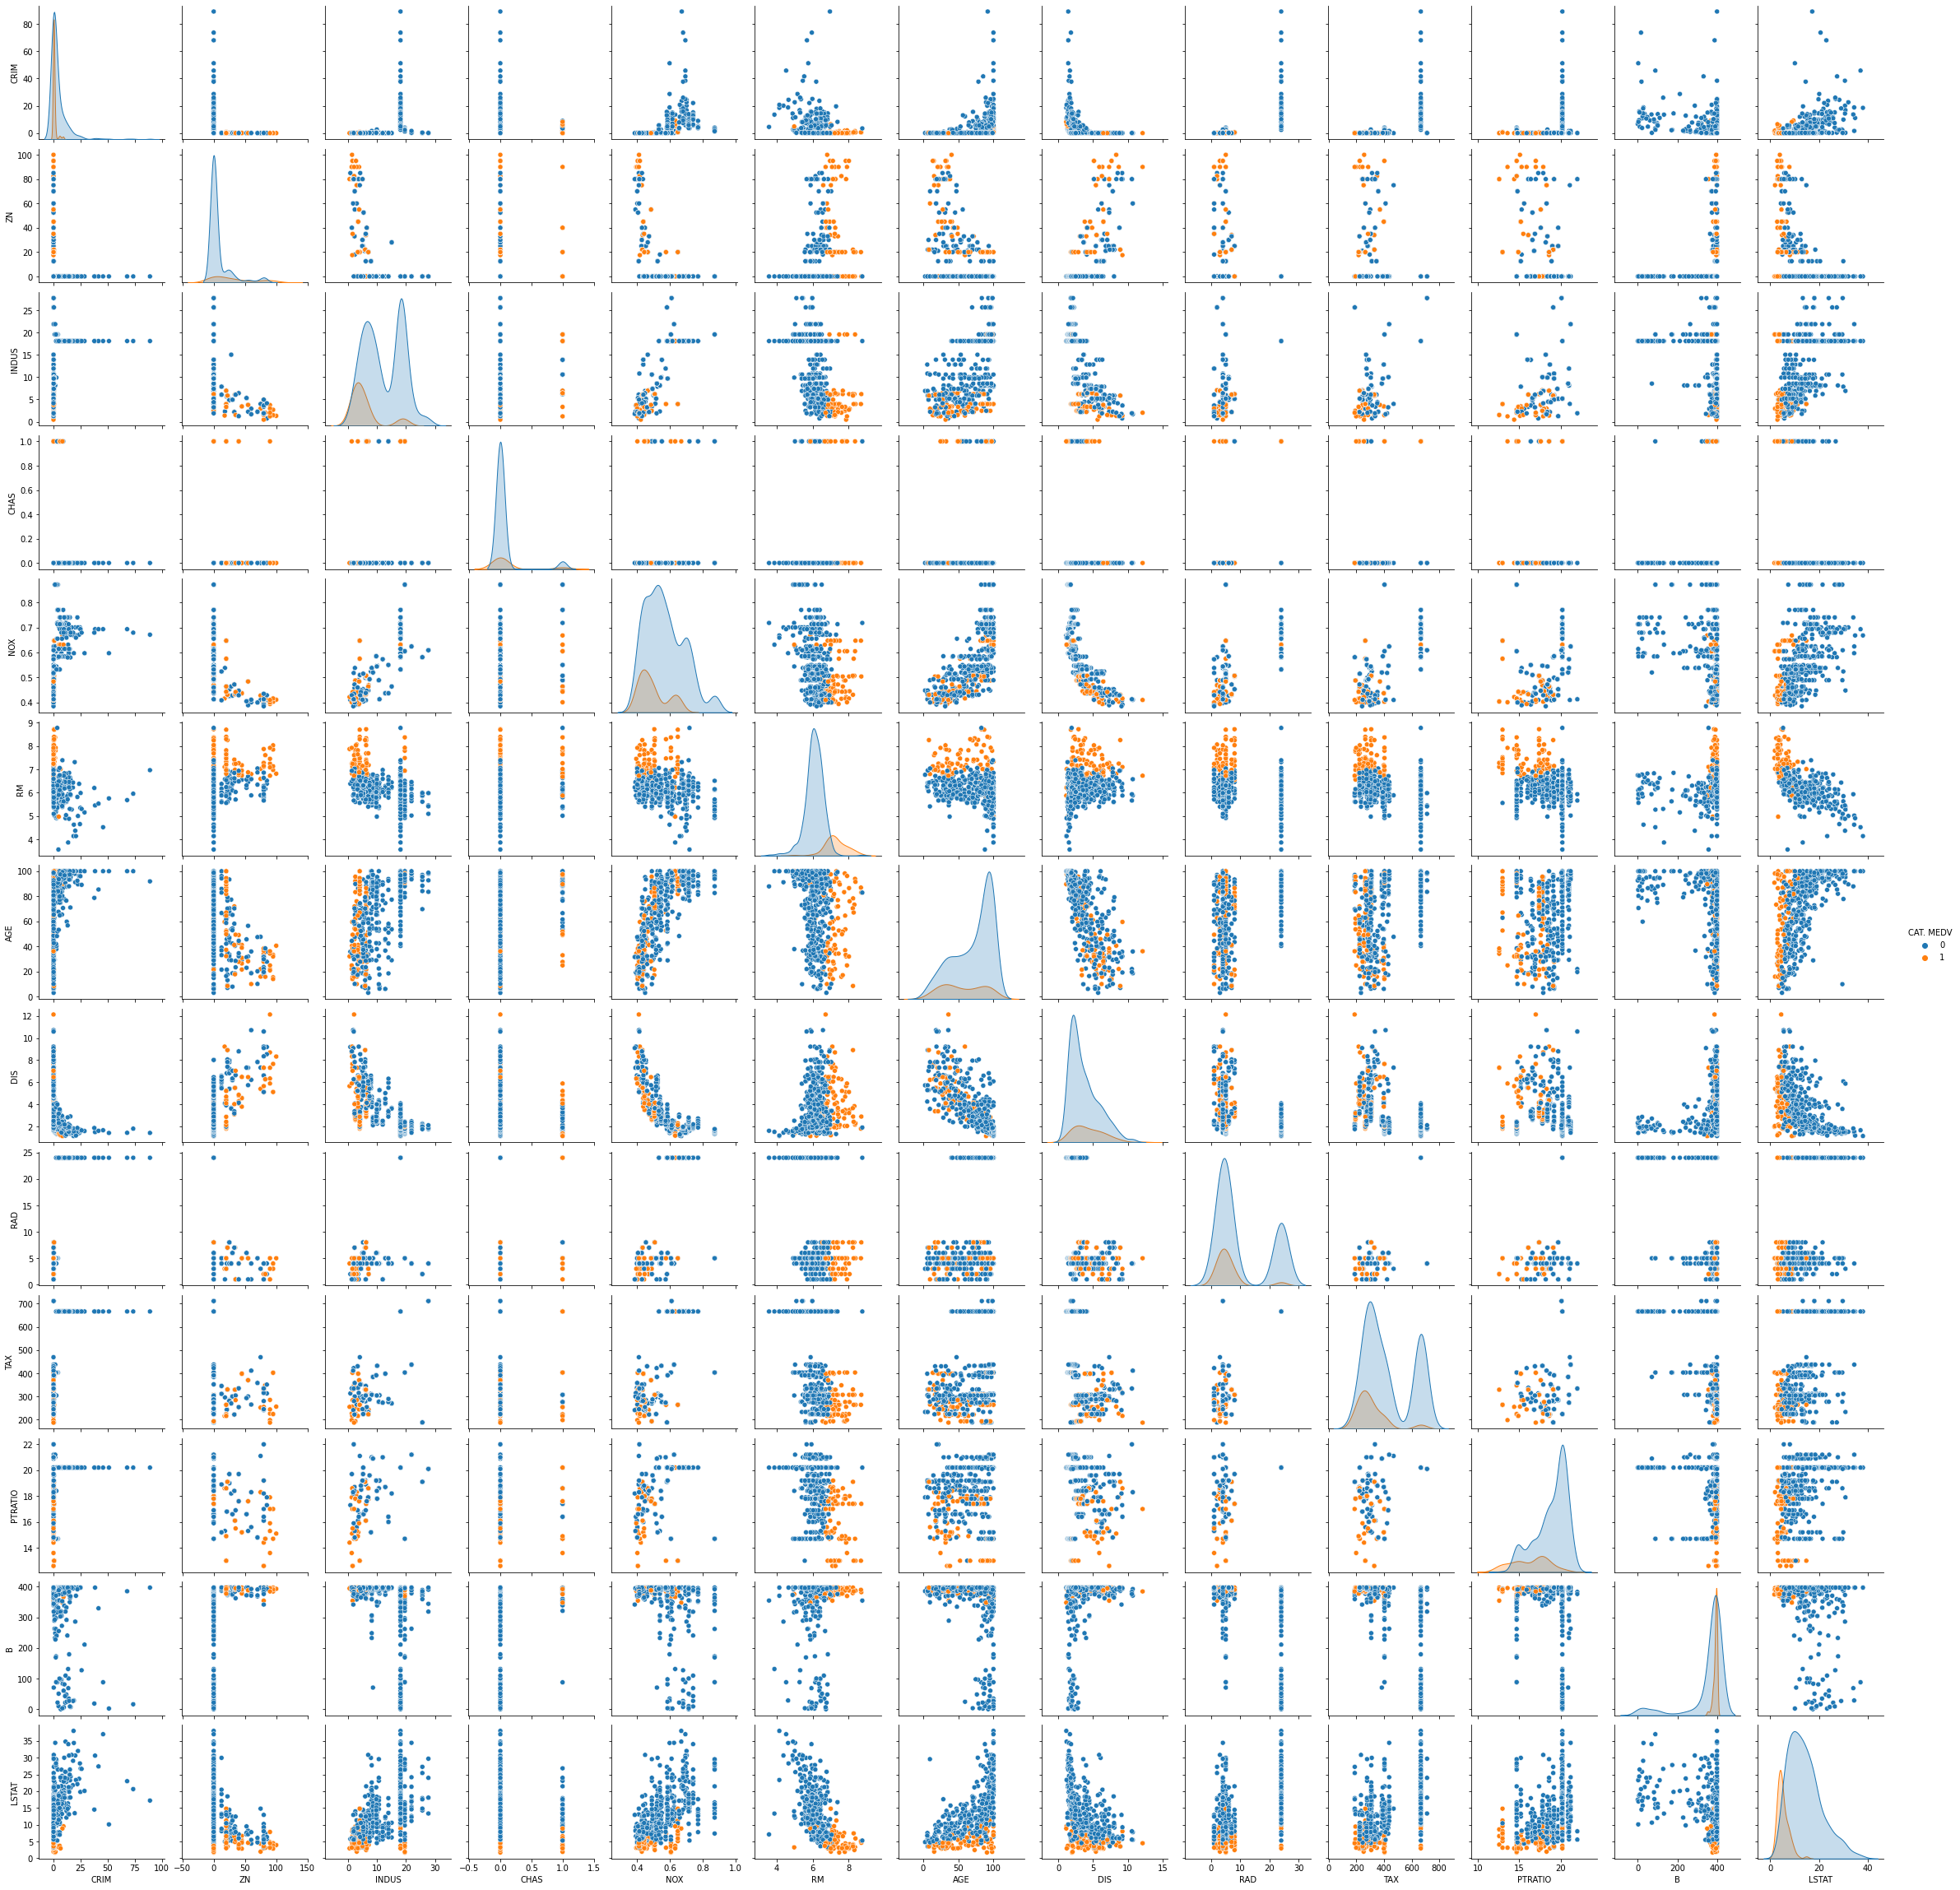

In [ ]:
sns.pairplot(df, hue = 'CAT. MEDV')

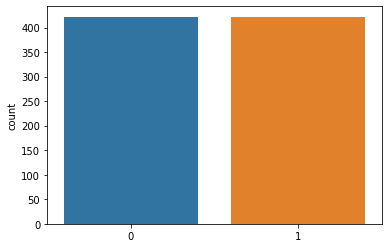

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(['CAT. MEDV'], axis = 1)
y = df['CAT. MEDV']

oversample = RandomOverSampler(random_state = 42)
X1, y1 = oversample.fit_resample(X, y)

sns.countplot(y1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[128,   3],
       [  0, 123]])

In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred))

Accuracy:  0.9881889763779528


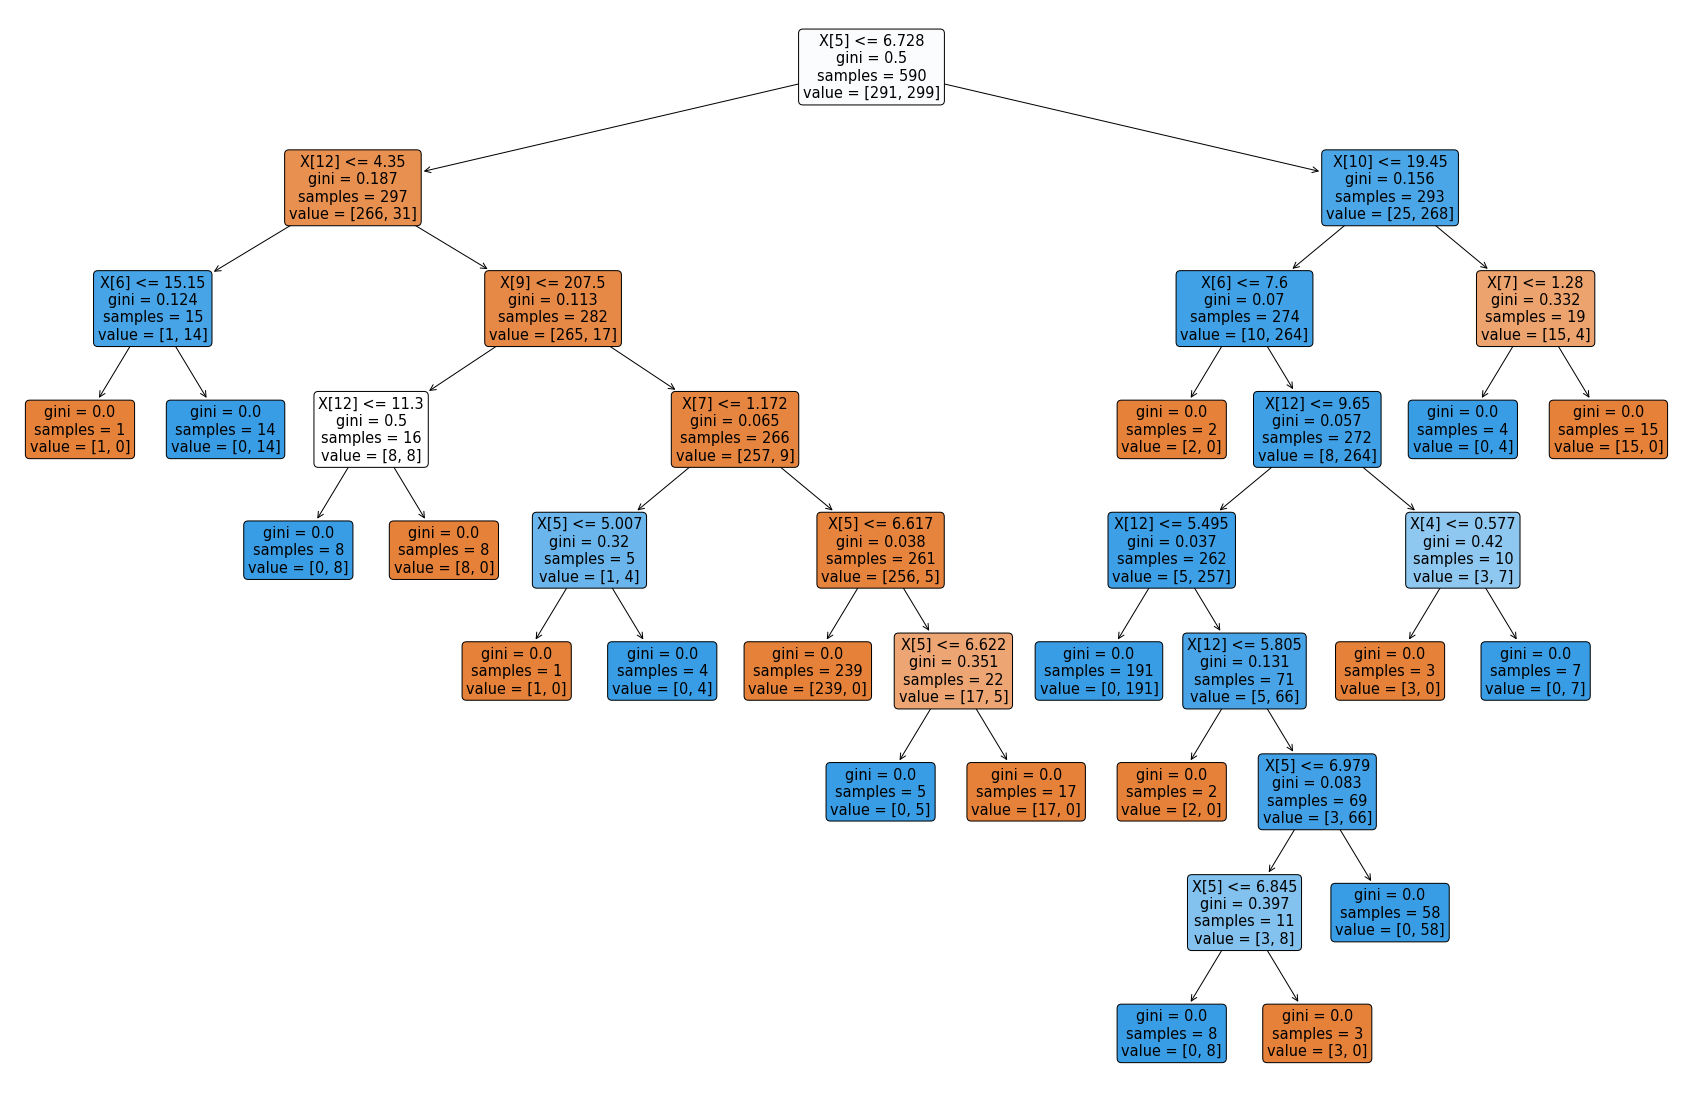

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
img = tree.plot_tree(model, filled = True, rounded = True)
plt.show()

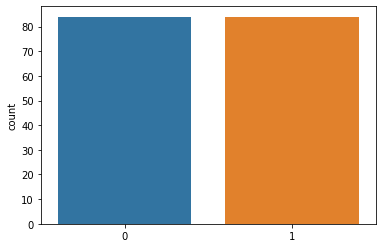

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state = 42)
X2, y2 = undersample.fit_resample(X, y)
sns.countplot(y2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred1 = model1.predict(X_test)

In [ ]:
cm1 = confusion_matrix(y_test, pred1)
cm1

array([[24,  2],
       [ 2, 23]])

In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred1))

Accuracy:  0.9215686274509803


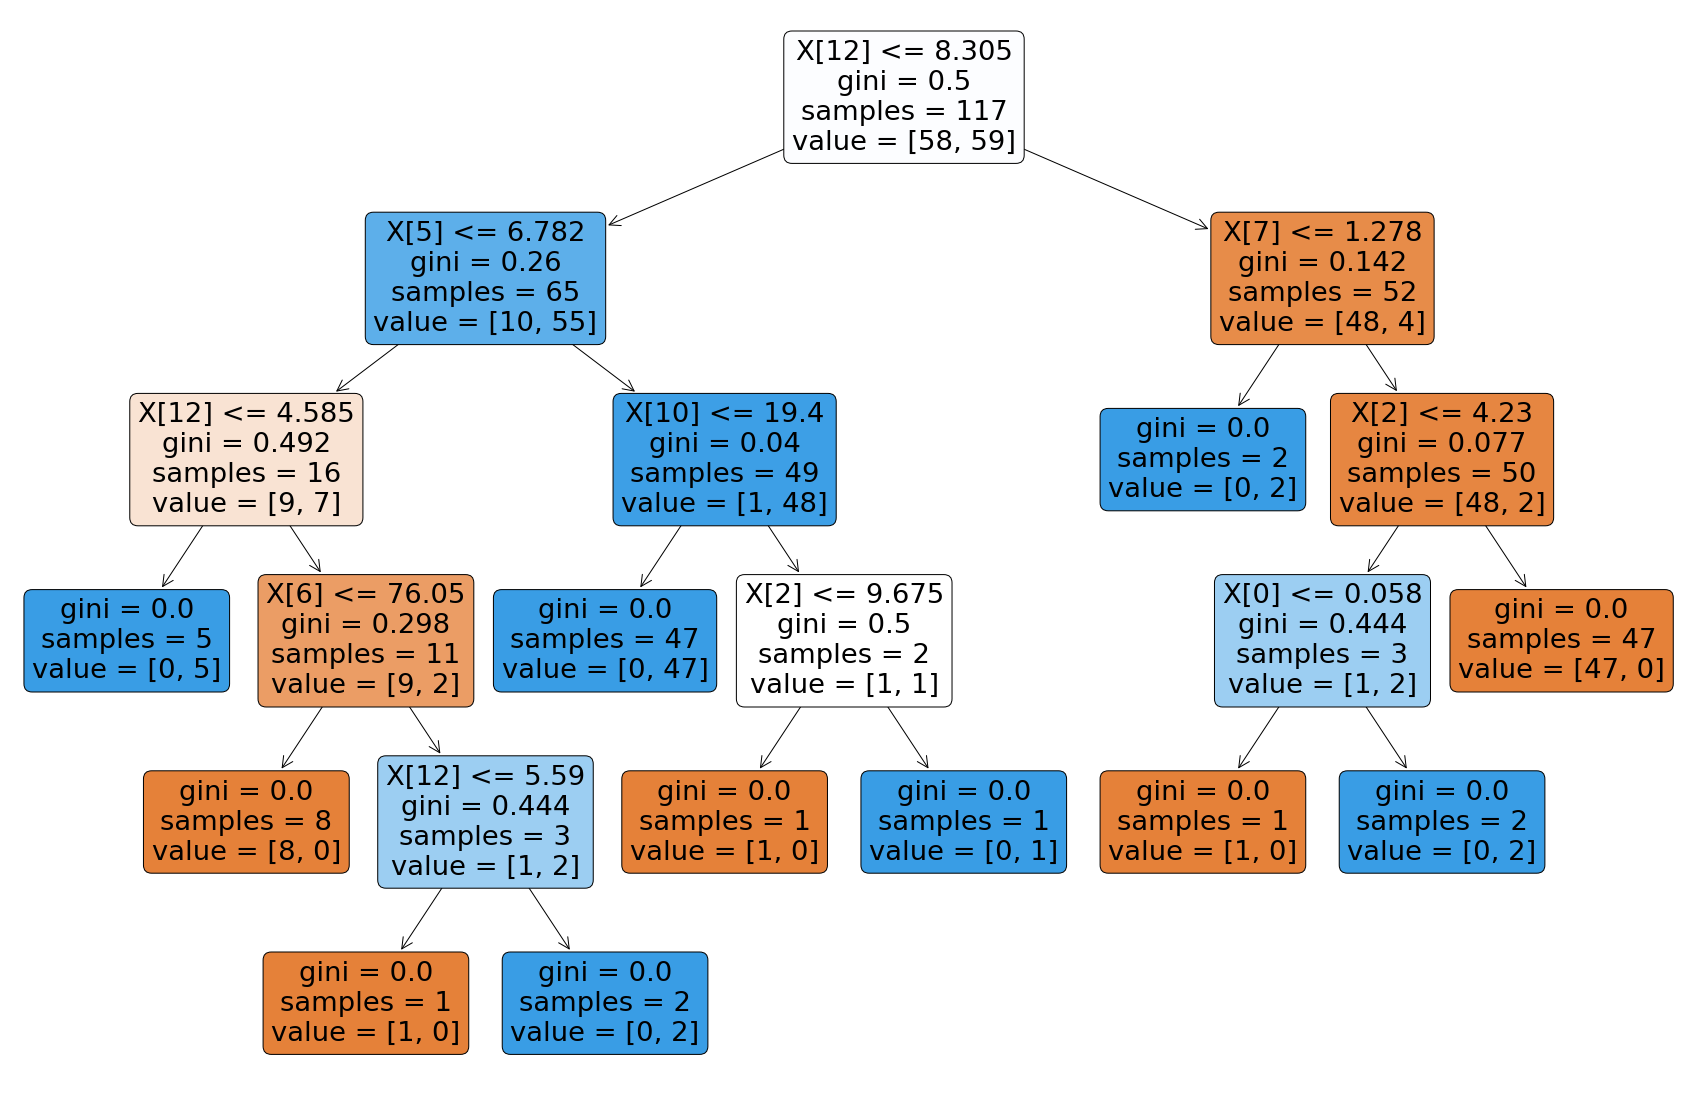

In [ ]:
fig = plt.figure(figsize=(30,20))
img = tree.plot_tree(model1, filled = True, rounded = True)
plt.show()

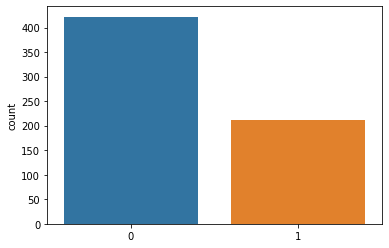

In [ ]:
over = RandomOverSampler(sampling_strategy=0.5)
X3, y3 = over.fit_resample(X, y)
sns.countplot(y3)

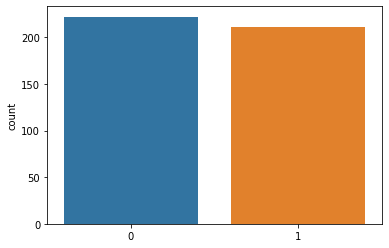

In [ ]:
under = RandomUnderSampler(sampling_strategy=0.95)
X4, y4 = under.fit_resample(X3, y3)
sns.countplot(y4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.3, random_state = 42)
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
pred2 = model2.predict(X_test)

In [ ]:
cm2 = confusion_matrix(y_test, pred2)
cm2

array([[70,  3],
       [ 1, 56]])

In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred2))

Accuracy:  0.9692307692307692


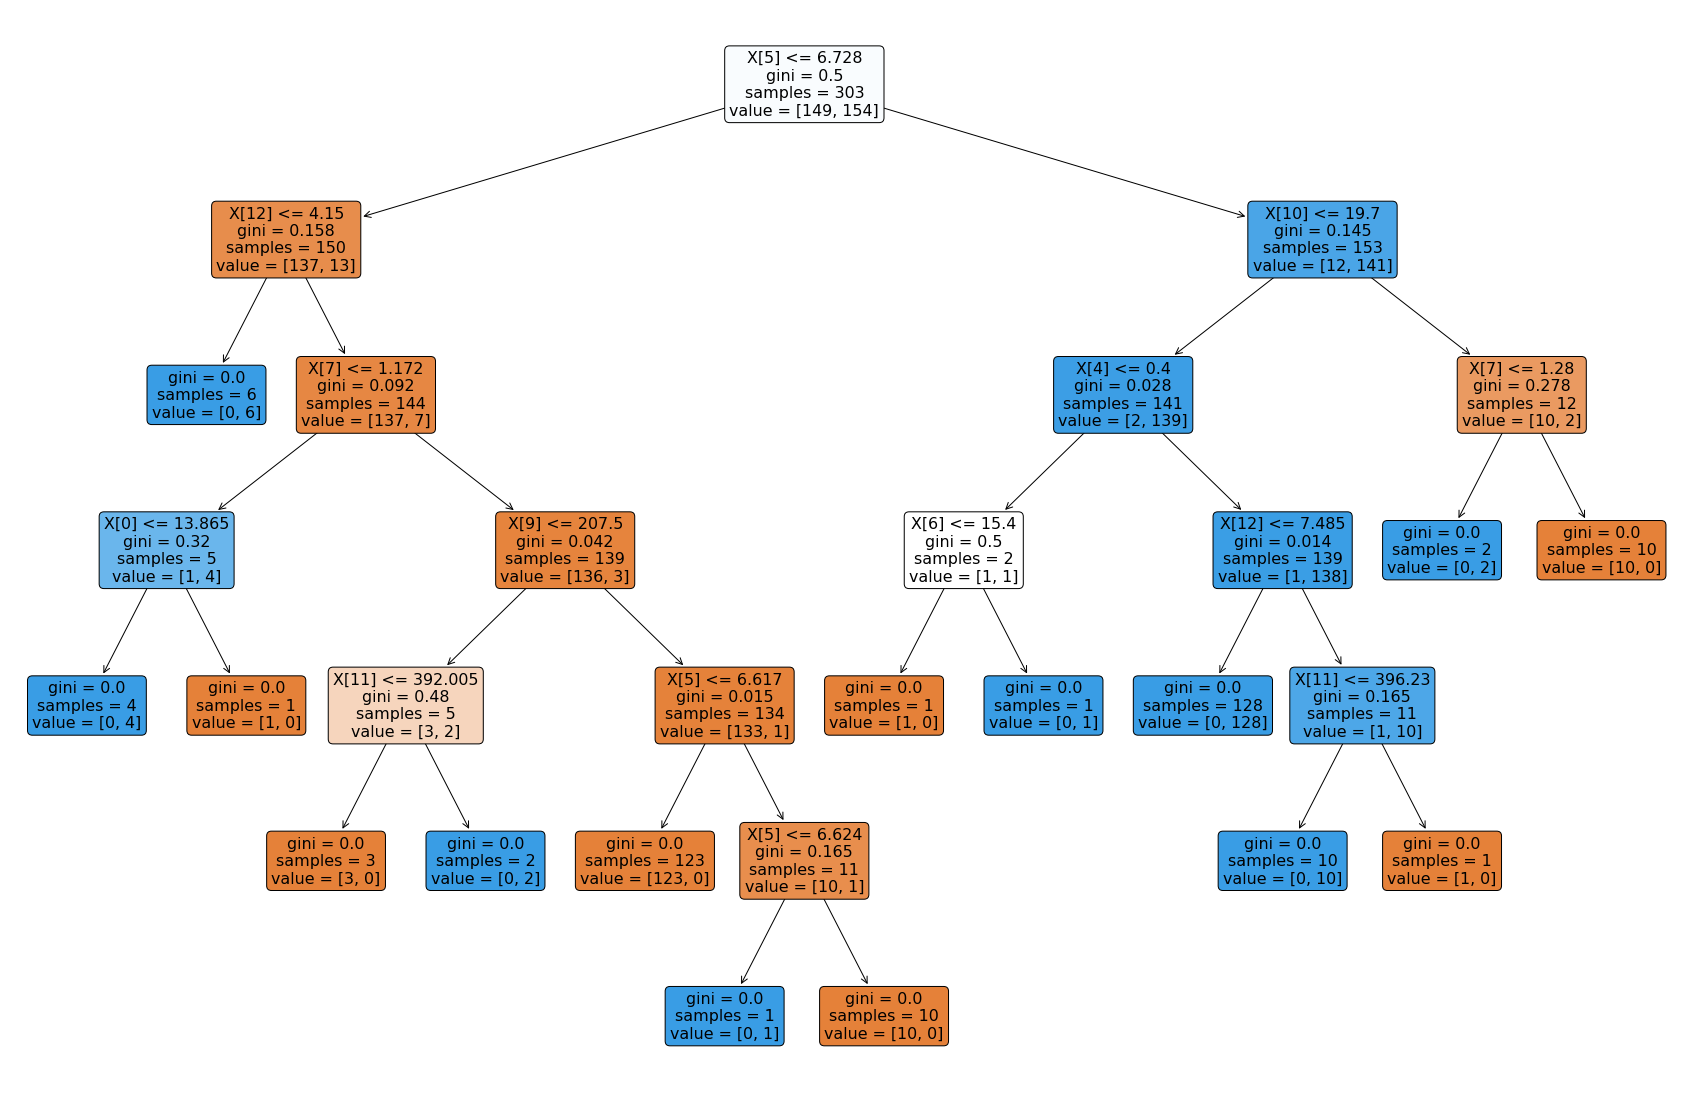

In [ ]:
fig = plt.figure(figsize=(30,20))
img = tree.plot_tree(model2, filled = True, rounded = True)
plt.show()